<a href="https://colab.research.google.com/github/bob8dod/NLP_SelfStudying/blob/main/Keras_for_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras for DeepLearning

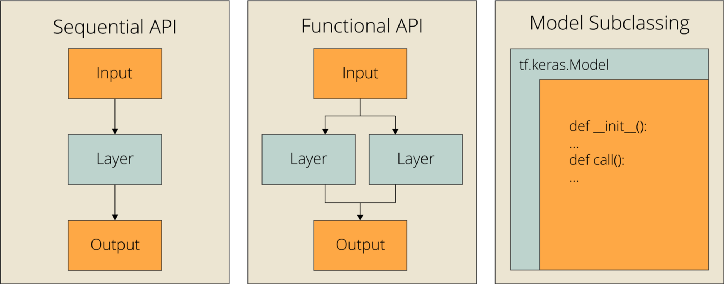

## Keras (Sequential API)

여러층을 공유하거나 다양한 종류의 입력과 출력을 사용하는 등의  
복잡한 모델을 만드는 일에는 한계가 있음

In [ ]:
# 토큰화와 정수 인코딩
from tensorflow.keras.preprocessing.text import Tokenizer
t = Tokenizer()
fit_text = "저는 이 향수가 아주 마음에 듭니다"
t.fit_on_texts([fit_text])

test_text = '저는 이 향수가 정말 마음에 듭니다' 
sequences = t.texts_to_sequences([test_text])[0]
print(sequences) #해당 문장 정수 인덱싱 #단어집합엔 '정말'이 없음
print(t.word_index) #단어 집합

[1, 2, 3, 5, 6]
{'저는': 1, '이': 2, '향수가': 3, '아주': 4, '마음에': 5, '듭니다': 6}


In [ ]:
# padding
# 모델의 입력으로 사용하려면 모든 샘플의 길이를 동일하게 맞추어야 함
# 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로
from tensorflow.keras.preprocessing.sequence import pad_sequences
pad_sequences([[1,2,3],[3,4,5,6],[7,8]], maxlen=3, padding='pre') #앞을 자르거나 채움

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

In [ ]:
# 워드 임베딩
# 대부분의 값이 실수이고, 상대적으로 저차원인 밀집 벡터(dense vector)
# 임베딩 벡터는 초기에는 랜덤값을 가지지만, 인공 신경망의 가중치가 학습되는 방법과 같은 방식으로 값이 학습되며 변경
# Embedding() : 임베딩 층(embedding layer)을 만드는 역할
from tensorflow.keras.layers import Embedding
text=[['Hope', 'to', 'see', 'you', 'soon'],['Nice', 'to', 'see', 'you', 'again']]

# 각 단어에 대한 정수 인코딩
text=[[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 위 데이터가 아래의 임베딩 층의 입력이 된다.
Embedding(7, 2, input_length=5)
# 7은 단어의 개수. 즉, 단어 집합(vocabulary)의 크기이다.
# 2는 임베딩한 후의 벡터의 크기이다.
# 5는 각 입력 시퀀스의 길이. 즉, input_length이다.

In [ ]:
#모델링
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
# Embedding()을 통해 생성하는 임베딩 층(embedding layer) 또한 인공 신경망의 층의 하나이므로 model.add()로 추가
model = Sequential()
model.add(Embedding(10,2,input_length=5))

In [ ]:
#FCNN-1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))
# 첫번째 인자 = 출력 뉴런의 수.
# input_dim = 입력 뉴런의 수. (입력의 차원)
# activation = 활성화 함수.

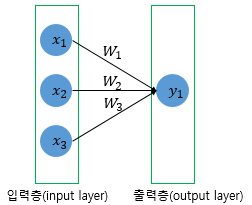

In [ ]:
# FCNN-2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(8,input_dim=4, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

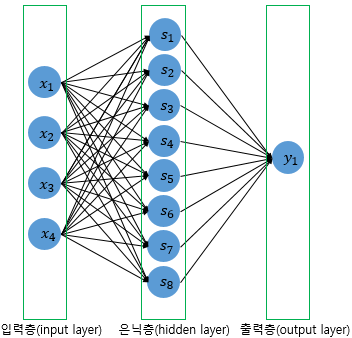

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#컴파일 및 훈련
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
max_features = 10000

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32)) #RNN에 대한 설명은 뒤의 챕터에서 합니다.
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [ ]:
# model.fit(X_train, y_train, epochs=10, batch_size=32)
# model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))
# 훈련 데이터의 20%를 검증 데이터로 사용.
# model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))

In [ ]:
# 평가 및 예측
# model.evaluate(X_test, y_test, batch_size=32)
# model.predict(X_input, batch_size=32)

In [ ]:
# 저장과 로드
model.save("model_name.h5")
from tensorflow.keras.models import load_model
model = load_model("model_name.h5")

## Keras (Function API)

각 층을 일종의 함수(function)로서 정의  
각 함수를 조합하기 위한 연산자들을 제공하는데, 이를 이용하여 신경망을 설계

### 피드 포워드 신경망(Fully-connected FFNN)

In [ ]:
# 입력 데이터의 크기(shape)를 인자로 입력층을 정의
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 입력의 차원이 1, # 은닉층과 출력층을 추가
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='relu')(hidden2)

# Model에 입력 텐서와 출력 텐서를 정의
model = Model(inputs=inputs, outputs=output)
# 컴파일 및 학습
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(data, labels)

In [ ]:
#똑같은 표현
inputs = Input(shape=(10,))
x = Dense(8, activation="relu")(inputs)
x = Dense(4, activation="relu")(x)
x = Dense(1, activation="linear")(x)
model = Model(inputs, x)

### 선형 회귀(Linear Regression)

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs,output)

sgd = optimizers.SGD(lr = 0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X,y,batch_size=1, epochs=10, shuffle=False, verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
9/9 [==============================] - 0s 1ms/step - loss: 331.3080 - mse: 331.3080
Epoch 2/10
9/9 [==============================] - 0s 1ms/step - loss: 2.1978 - mse: 2.1978
Epoch 3/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1960 - mse: 2.1960
Epoch 4/10
9/9 [==============================] - 0s 1ms/step - loss: 2.1943 - mse: 2.1943
Epoch 5/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1926 - mse: 2.1926
Epoch 6/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1910 - mse: 2.1910
Epoch 7/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1895 - mse: 2.1895
Epoch 8/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1880 - mse: 2.1880
Epoch 9/10
9/9 [==============================] - 0s 2ms/step - loss: 2.1865 - mse: 2.1865
Epoch 10/10
9/9 [==============================] - 0s 1ms/step - loss: 2.1852 - mse: 2.1852


In [ ]:
# 로지스틱 회귀(Logistic Regression)
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

### 다중 입력을 받는 모델

functional API를 사용하면 아래와 같이 다중 입력과 다중 출력을 가지는 모델도 만들 수 있음

In [ ]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

# 연결된 값을 입력으로 받는 밀집층을 추가(Dense layer)
z = Dense(2, activation="relu")(result)
# 선형 회귀를 위해 activation=linear를 설정
z = Dense(1, activation="linear")(z)

# 결과적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델이 됨.
model = Model(inputs=[x.input, y.input], outputs=z)

### RNN(Recurrence Neural Network) 은닉층

하나의 특성(feature)에 50개의 시점(time-step)을 입력으로 받는 모델을 설계

In [ ]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs) # RNN의 일종인 LSTM을 사용
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=output)

## Keras (Subclassing API)

Subclassing API로는 Functional API가 구현할 수 없는 모델들조차 구현할 수 있는 경우가 있음  
-> 재귀 네트워크나 트리 RNN

In [ ]:
import tensorflow as tf

class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred

model = LinearRegression()

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
model.fit(X,y, batch_size=1, epochs=30, shuffle=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
9/9 [==============================] - 0s 2ms/step - loss: 356.0502 - mse: 356.0502
Epoch 2/30
9/9 [==============================] - 0s 2ms/step - loss: 2.2467 - mse: 2.2467
Epoch 3/30
9/9 [==============================] - 0s 2ms/step - loss: 2.2431 - mse: 2.2431
Epoch 4/30
9/9 [==============================] - 0s 1ms/step - loss: 2.2397 - mse: 2.2397
Epoch 5/30
9/9 [==============================] - 0s 2ms/step - loss: 2.2363 - mse: 2.2363
Epoch 6/30
9/9 [==============================] - 0s 1ms/step - loss: 2.2331 - mse: 2.2331
Epoch 7/30
9/9 [==============================] - 0s 1ms/step - loss: 2.2301 - mse: 2.2301
Epoch 8/30
9/9 [==============================] - 0s 1ms/step - loss: 2.2271 - mse: 2.2271
Epoch 9/30
9/9 [==============================] - 0s 1ms/step - loss: 2.2242 - mse: 2.2242
Epoch 10/30
9/9 [==============================] - 0s 2ms/step - loss: 2.2215 - mse: 2.2215
Epoch 11/30
9/9 [==============================] - 0s 2ms/step - loss: 2.2188 - mse: 

## MLP(다층 퍼셉트론)

### texts_to_matrix()

입력된 텍스트 데이터로부터 행렬(matrix)를 만드는 도구  
총 4개의 모드 : binary', 'count', 'freq', 'tfidf'

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer #토큰화 및 정수 인코딩(단어 인덱싱)

texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']
t = Tokenizer()
t.fit_on_texts(texts)
print(t.word_index) #정수 인코딩(단어 인덱싱)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [ ]:
# COUNT
print(t.texts_to_matrix(texts, mode = 'count')) 
# 문서 단어 행렬(Document-Term Matrix, DTM)을 생성
# 완성되는 행렬의 인덱스는 0부터 시작
# 실제로 단어의 개수는 9개였지만 완성된 행렬의 열의 개수는 10개인 것과 첫번째 열은 모든 행에서 값이 0인 것 주의
# 인덱스 0에는 그 어떤 단어도 할당되지 않았음

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [ ]:
# BINARY
print(t.texts_to_matrix(texts, mode = 'binary'))
# 세번째 행, 두번째 열의 값이 DTM에서는 2였는데 여기서는 1로
# 해당 단어가 몇 개였는지는 무시
# 단어의 존재 유무로만 행렬을 표현

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [ ]:
# TFIDF
print(t.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림
# TF-IDF 챕터에서 배운 기본식이나 사이킷런의 TfidfVectorizer에서 사용하는 식이랑 또 조금 다름
# TF를 각 문서에서의 각 단어의 빈도에 자연 로그를 씌우고 1을 더한 값으로 정의
# 여전히 TF-IDF의 기존 의도를 갖고 있다고 이해


[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [ ]:
# FREQ
print(t.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림
# 각 단어의 등장 횟수를 분자로, 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총 합)를 분모

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


### 실전 (20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해)  

- 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것
- DNN 사용

데이터 준비

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [ ]:
newsdata = fetch_20newsgroups(subset = 'train') # 훈련 데이터만 리턴
print(newsdata.keys())
# 실제로 훈련에 사용할 속성은 이메일 본문인 data와 메일이 어떤 주제인지 기재된 숫자 레이블인 target

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [ ]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
# 첫번째 샘플의 경우에는 몇 번 주제인지 확인
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))
print(newsdata.data[0]) # 첫번째 샘플 출력

첫번째 샘플의 레이블 : 7
7번 레이블이 의미하는 주제 : rec.autos
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
# 훈련에 사용될 메일 본문인 data와 레이블인 target을 데이터프레임으로 만들어서 데이터에 대한 통계적인 정보들을 알아보기
data = pd.DataFrame(newsdata.data, columns = ['email']) # data로부터 데이터프레임 생성
data['target'] = newsdata.target # target 열 추가
data.head()

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
print('결측치 존재 유무: ',data.isnull().values.any())
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

결측치 존재 유무:  False
중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


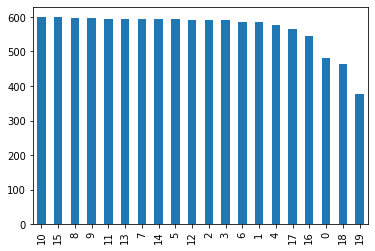

In [ ]:
data['target'].value_counts().plot(kind='bar')

In [ ]:
data.groupby('target')['email'].count()

target
0     480
1     584
2     591
3     590
4     578
5     593
6     585
7     594
8     598
9     597
10    600
11    595
12    591
13    594
14    593
15    599
16    546
17    564
18    465
19    377
Name: email, dtype: int64

In [ ]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) # 'test'를 기재하면 테스트 데이터만 리턴한다.
train_email = data['email'] # 훈련 데이터의 본문 저장
train_label = data['target'] # 훈련 데이터의 레이블 저장
test_email = newsdata_test.data # 테스트 데이터의 본문 저장
test_label = newsdata_test.target # 테스트 데이터의 레이블 저장

전처리 진행 (모델의 input 데이터 준비)

In [ ]:
max_words = 10000 # 실습에 사용할 단어의 최대 개수
num_classes = 20 # 레이블의 수

In [ ]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    t = Tokenizer(num_words = max_words) # max_words 개수만큼의 단어만 사용한다.
    t.fit_on_texts(train_data)
    X_train = t.texts_to_matrix(train_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    X_test = t.texts_to_matrix(test_data, mode=mode) # 샘플 수 × max_words 크기의 행렬 생성
    return X_train, X_test, t.index_word

In [ ]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [ ]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [ ]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


모델 설계 및 학습 진행

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(max_words,), activation='relu')) 
    # 각 샘플의 모양(데이터의 feature수) 만 지정되므로 배치 크기는 항상 생략됨. -> 뒤에서 batch_size로 지정해서 학습하기 때문
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax')) 

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

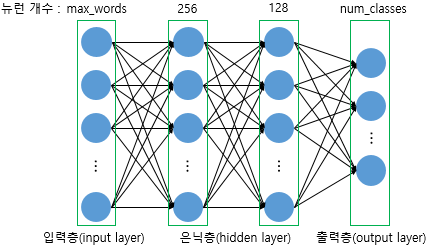

texts_to_matrix()의 4개의 모드에 대해서 전부 모델의 결과를 확인

In [ ]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/20
80/80 [==============================] - 3s 39ms/step - loss: 2.2937 - accuracy: 0.3323 - val_loss: 0.9819 - val_accuracy: 0.8004
Epoch 2/20
80/80 [==============================] - 3s 37ms/step - loss: 0.8796 - accuracy: 0.7557 - val_loss: 0.4550 - val_accuracy: 0.8887
Epoch 3/20
80/80 [==============================] - 3s 37ms/step - loss: 0.4295 - accuracy: 0.8867 - val_loss: 0.3598 - val_accuracy: 0.9046
Epoch 4/20
80/80 [==============================] - 3s 37ms/step - loss: 0.2539 - accuracy: 0.9338 - val_loss: 0.3070 - val_accuracy: 0.9081
Epoch 5/20
80/80 [==============================] - 3s 37ms/step - loss: 0.1740 - accuracy: 0.9572 - val_loss: 0.2920 - val_accuracy: 0.9134
Epoch 6/20
80/80 [==============================] - 3s 37ms/step - loss: 0.1258 - accuracy: 0.9708 - val_loss: 0.2934 - val_accuracy: 0.9152
Epoch 7/20
80/80 [==============================] - 3s 37ms/step - loss: 0.0880 - accuracy: 0.9800 - val_loss: 0.2887 - val_accuracy: 0.9196
Epoch 8/20
80

## 피드 포워드 신경망 언어 모델(Neural Network Language Model, NNLM)

In [ ]:
#찾아서 구현해봐라